In [502]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.optimizers import Adam

In [513]:
# Import data
df_previous = pd.read_csv('Resources/PlayerSeasonTotals_2122_2324.csv')
df_current = pd.read_csv('Resources/PlayerSeasonTotals_2425.csv')

### Prepare Previous Year Data (2021/2022, 2022/2023, 2023/2024 Seasons)

In [518]:
# Create Points Per Game Metric
df_previous['PPG'] = df_previous['Total Points'] / df_previous['GP']

In [520]:
# Preview data for data from 2021/2022 through 2023/2024 season
df_previous[['Player', 'GP', 'Total Points', 'PPG']]

,Player,GP,Total Points,PPG
0,Connor McDavid,238,408,1.714286
1,Leon Draisaitl,241,344,1.427386
2,Nathan MacKinnon,218,339,1.555046
3,Nikita Kucherov,210,326,1.552381
4,Artemi Panarin,239,308,1.288703
5,Mikko Rantanen,237,301,1.270042
6,Matthew Tkachuk,241,301,1.248963
7,David Pastrnak,236,300,1.271186
8,Auston Matthews,228,298,1.307018
9,J.T. Miller,242,284,1.173554


In [522]:
# Count the number of rows where Total Points equals 0
rows_with_zero_points = df_previous[df_previous['Total Points'] == 0].shape[0]

print(f"Number of rows with Total Points = 0: {rows_with_zero_points}")

Number of rows with Total Points = 0: 144


In [524]:
#Remove rows where Total Points = 0
df_previous = df_previous[df_previous["Total Points"] != 0]
df_previous[['Player', 'GP', 'Total Points', 'PPG']]

,Player,GP,Total Points,PPG
0,Connor McDavid,238,408,1.714286
1,Leon Draisaitl,241,344,1.427386
2,Nathan MacKinnon,218,339,1.555046
3,Nikita Kucherov,210,326,1.552381
4,Artemi Panarin,239,308,1.288703
5,Mikko Rantanen,237,301,1.270042
6,Matthew Tkachuk,241,301,1.248963
7,David Pastrnak,236,300,1.271186
8,Auston Matthews,228,298,1.307018
9,J.T. Miller,242,284,1.173554


In [530]:
# Count the number of rows where GP < 60 
rows_less_than_60_points = df_previous[df_previous['GP'] < 60].shape[0]

print(f"Number of rows with Total Points < 60 : {rows_less_than_60_points}")

Number of rows with Total Points < 60 : 0


In [532]:
#Remove rows where GP < 60 
df_previous = df_previous[df_previous["GP"] >= 60 ]
df_previous[['Player', 'GP', 'Total Points', 'PPG']].head()

,Player,GP,Total Points,PPG
0,Connor McDavid,238,408,1.714286
1,Leon Draisaitl,241,344,1.427386
2,Nathan MacKinnon,218,339,1.555046
3,Nikita Kucherov,210,326,1.552381
4,Artemi Panarin,239,308,1.288703


### Prepare Current Year Data (2024/2025 partially completed Season)

In [535]:
# Create Points Per Game Metric
df_current['PPG'] = df_current['Total Points'] / df_current['GP']

In [537]:
# Preview data for data for the 2024/2025 season (current season)
df_current[['Player', 'GP', 'Total Points', 'PPG']]

,Player,GP,Total Points,PPG
0,Nathan MacKinnon,41,66,1.609756
1,Leon Draisaitl,39,59,1.512821
2,Mikko Rantanen,41,58,1.414634
3,Mitch Marner,41,56,1.365854
4,Nikita Kucherov,35,55,1.571429
5,Connor McDavid,36,54,1.500000
6,Kyle Connor,41,52,1.268293
7,Jack Eichel,39,52,1.333333
8,Kirill Kaprizov,34,50,1.470588
9,Cale Makar,41,49,1.195122


In [539]:
# Count the number of rows where Total Points equals 0
rows_with_zero_points = df_current[df_current['Total Points'] == 0].shape[0]

print(f"Number of rows with Total Points = 0: {rows_with_zero_points}")

Number of rows with Total Points = 0: 104


In [541]:
#Remove rows where Total Points = 0
df_current = df_current[df_current["Total Points"] != 0]
df_current[['Player', 'GP', 'Total Points', 'PPG']]

,Player,GP,Total Points,PPG
0,Nathan MacKinnon,41,66,1.609756
1,Leon Draisaitl,39,59,1.512821
2,Mikko Rantanen,41,58,1.414634
3,Mitch Marner,41,56,1.365854
4,Nikita Kucherov,35,55,1.571429
5,Connor McDavid,36,54,1.500000
6,Kyle Connor,41,52,1.268293
7,Jack Eichel,39,52,1.333333
8,Kirill Kaprizov,34,50,1.470588
9,Cale Makar,41,49,1.195122


In [543]:
# Count the number of rows where GP < 20 
rows_less_than_20_points = df_current[df_current['GP'] < 20].shape[0]

print(f"Number of rows with GP < 20 : {rows_less_than_20_points}")

Number of rows with GP < 20 : 103


In [545]:
#Remove rows where GP < 20 
df_previous = df_previous[df_previous["GP"] >= 20 ]
df_previous[['Player', 'GP', 'Total Points', 'PPG']].head()

,Player,GP,Total Points,PPG
0,Connor McDavid,238,408,1.714286
1,Leon Draisaitl,241,344,1.427386
2,Nathan MacKinnon,218,339,1.555046
3,Nikita Kucherov,210,326,1.552381
4,Artemi Panarin,239,308,1.288703


In [547]:
# Prepare features and target variable
features = ['TOI', 'Shots', 'ixG', 'iCF', 'iFF', 'iSCF', 'iHDCF', 'Rush Attempts', 'Rebounds Created', 'PIM', 
            'Total Penalties', 'Penalties Drawn', 'Giveaways', 'Takeaways', 'Hits', 'Hits Taken', 'Shots Blocked', 'Faceoffs Won', 'Faceoffs Lost']
target = 'PPG'

X = df_previous[features]
y = df_previous[target]

In [549]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [551]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit Random Forest Model

In [554]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [556]:
# Make predictions on test set
y_pred = rf_model.predict(X_test_scaled)

## Evaluate Model

In [559]:
#cm = confusion_matrix(y_test, y_pred)
#cm_df = pd.DataFrame(
 #   cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
#)

# Calculating the accuracy score
#acc_score = accuracy_score(y_test, y_pred)

In [561]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.012558140304976834
R-squared Score: 0.8306013057700516


## Apply Model to Current Season

In [576]:
# Prepare current season data
X_current = df_current[features]
X_current_scaled = scaler.transform(X_current)

In [578]:
# Predict points for current season
current_predictions_rf = rf_model.predict(X_current_scaled)*3

In [580]:
# Adjust predictions for 82-game schedule
games_played = df_current['GP']
current_points = df_current['Total Points']
remaining_games = 82 - games_played
current_ppg = current_points / games_played
projected_points = current_points + (current_ppg * remaining_games)

In [582]:
# Add predictions to current season dataframe
df_current['RF_Predicted_PPG'] = current_predictions_rf
df_current['RF_Predicted_Points'] = (current_predictions_rf *82).round().astype(int)

In [599]:
# Display results sorted by projected season points

# Create results dataframe
results = pd.DataFrame({
    'Player': df_current['Player'],
    'Games Played': games_played,
    'Current Points': current_points,
    'Current Pace': projected_points.round(0),
    'Model PPG': current_predictions_rf,
    'Model Prediction': (current_predictions_rf *82).round().astype(int)
})

# Set display options for pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap to multiple lines
pd.set_option('display.max_rows', None)     # Show all rows

# Sort by model predictions
results = results.sort_values('Model Prediction', ascending=False)
print("\nFull Season Point Predictions:")
print(results.to_string(index=True, justify='left'))


Full Season Point Predictions:
    Player                  Games Played  Current Points  Current Pace  Model PPG  Model Prediction
62           Brad Marchand  42            32               62.0         1.621892   133             
24          David Pastrnak  42            42               82.0         1.570704   129             
19        William Nylander  41            43               86.0         1.471295   121             
69        Connor McMichael  40            31               64.0         1.463258   120             
11             Jack Hughes  43            48               92.0         1.430158   117             
93          Wyatt Johnston  38            29               63.0         1.432132   117             
2           Mikko Rantanen  41            58              116.0         1.414745   116             
106            Nazem Kadri  39            27               57.0         1.404934   115             
42           Nico Hischier  43            36               69.0     

## Feature Importance

In [602]:
# Use sklearn to calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3295882321536211, 'iFF'),
 (0.298563085442227, 'Shots'),
 (0.07458497213623201, 'iSCF'),
 (0.06724941909368612, 'ixG'),
 (0.060732793625082306, 'Hits'),
 (0.03564723287596136, 'Giveaways'),
 (0.0293657568641446, 'iCF'),
 (0.01908543418611249, 'Takeaways'),
 (0.016431342273362872, 'TOI'),
 (0.011477485075885733, 'Penalties Drawn'),
 (0.00909664965312524, 'Hits Taken'),
 (0.008299397424795024, 'Rush Attempts'),
 (0.007593618067183852, 'Rebounds Created'),
 (0.007226162151041276, 'Shots Blocked'),
 (0.0056997184453127705, 'iHDCF'),
 (0.00532691813641875, 'PIM'),
 (0.004891548471160883, 'Faceoffs Won'),
 (0.0048182161106742364, 'Faceoffs Lost'),
 (0.00432201781397224, 'Total Penalties')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

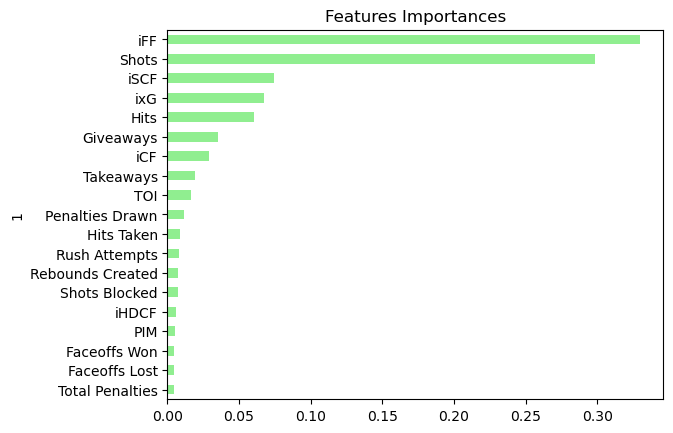

In [604]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## NHL Stats Glossary
**iFF** - Any unblocked shot attempt (goals, shots on net and misses) by the player, outside of the shootout.<br>
**Shots** - Any shot attempt on net (goals and shots on net) by the player, outside of the shootout.<br>
**iSCF** - Any scoring chance by the player, outside of the shootout.<br>
**ixG** - It estimates how many goals a player should have scored based on factors such as shot location, angle, and type<br>
**Hits** - Number of hits made by the player.<br>
**Giveaways** - Number of unforced turnovers made by the player.<br>
**iCF** - Any shot attempt (goals, shots on net, misses and blocks) by the player, outside of the shootout.<br>
**Takeaways** - Number of times the player takes the puck away from the opposition.<br>
**TOI** - Total amount of time played.<br>
**Penalties Drawn** - Number of penalties committed against the player.<br>
**Hits Taken** - Number of hits taken by the player.<br>
**Rush Attempts** - Any rush shot attempt (goals, shots on net, misses and blocks) by the player, outside of the shootout.<br>
**Rebounds Created** - Any shot attempt (shots on net, misses and blocks) that results in a rebound shot attempt.<br>
**Shots Blocked** - Number of opposition shot attempts blocked by the player.<br>
**iHDCF** - Any high danger scoring chance by the player, outside of the shootout.<br>
**PIM** - Penalty minutes assessed to the player.<br>
**Faceoffs Won** - Faceoffs won by the player<br>
**Faceoffs Lost** - Faceoffs lost by the player<br>
**Total Penalties** - Total number of penalties taken by the player